导入库

In [1]:
from scipy import stats
from scipy.stats import norm, skew
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import boxcox1p
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from scipy.special import boxcox1p
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

导入训练数据和测试数据

In [2]:
train = pd.read_csv('E:\\python code\\期末大作业\\train.csv')
test = pd.read_csv('E:\\python code\\期末大作业\\test_noLabel.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        350 non-null    int64 
 1   Age                       350 non-null    int64 
 2   BusinessTravel            350 non-null    object
 3   Department                350 non-null    object
 4   DistanceFromHome          350 non-null    int64 
 5   Education                 350 non-null    int64 
 6   EducationField            350 non-null    object
 7   EmployeeNumber            350 non-null    int64 
 8   EnvironmentSatisfaction   350 non-null    int64 
 9   Gender                    350 non-null    object
 10  JobInvolvement            350 non-null    int64 
 11  JobLevel                  350 non-null    int64 
 12  JobRole                   350 non-null    object
 13  JobSatisfaction           350 non-null    int64 
 14  MaritalStatus             

绘制相关性系数图

<AxesSubplot:>

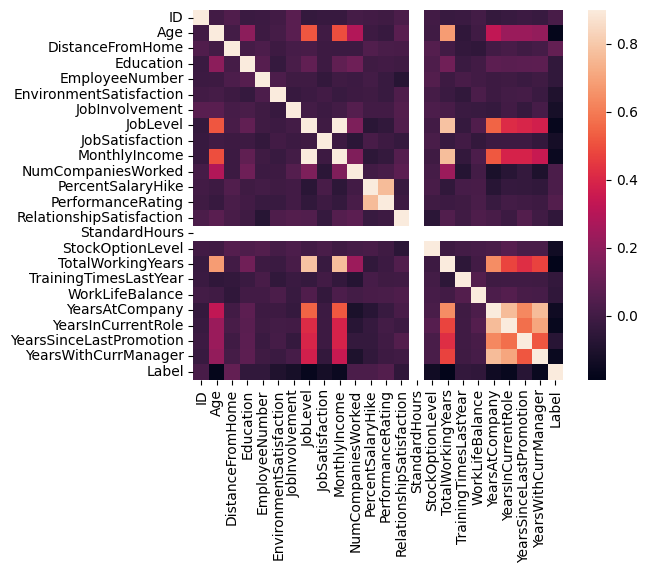

In [3]:
corrmat = train.corr()
sns.heatmap(corrmat,vmax=0.9,square = True)

发现月薪和工作等级相关性较强

整合训练集和测试集

In [4]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train,test)).reset_index(drop = True)

删掉无用特征

In [5]:
all_data.drop(['Over18'],axis=1,inplace=True)

观察年龄结构

C:\Users\15825\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\15825\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


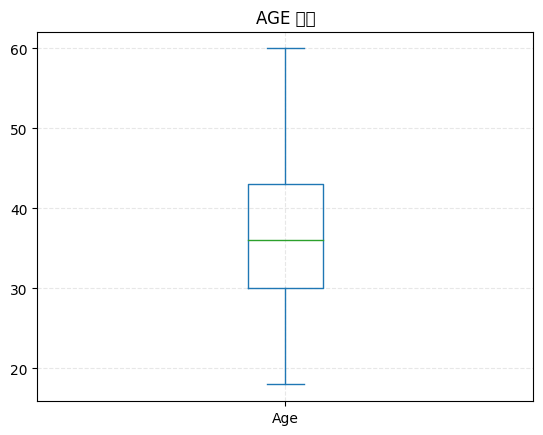

In [7]:
all_data['Age'].plot.box(title = "AGE 分布")
plt.grid(linestyle='--',alpha = 0.3)
plt.show()